# noisy_Demo4: Training veri seti üzerine ikinci aşama gürültü eklenmiş hali

In [1]:
import os, shutil
from os import listdir
import cv2 as cv 
import numpy as np
from os.path import isfile , join 
import matplotlib.pyplot as plt

In [2]:
original_dataset_dir = r"C:\Users\krmtt\Desktop\e-scooter rider dataset"

base_dir= r"C:\Users\krmtt\Desktop\e-scooterDetectionDataset"
os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir=os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_esc_dir=os.path.join(train_dir, 'esc')
os.mkdir(train_esc_dir)

train_no_esc_dir=os.path.join(train_dir, 'no_esc')
os.mkdir(train_no_esc_dir)

validation_esc_dir=os.path.join(validation_dir,'esc')
os.mkdir(validation_esc_dir)

validation_no_esc_dir=os.path.join(validation_dir,'no_esc')
os.mkdir(validation_no_esc_dir)

test_esc_dir=os.path.join(test_dir,'esc')
os.mkdir(test_esc_dir)

test_no_esc_dir=os.path.join(test_dir,'no_esc')
os.mkdir(test_no_esc_dir)

fnames = [r'esc ({}).jpg'.format(i) for i in range(1,9000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_esc_dir, fname)
    shutil.copyfile(src, dst)
    
fnames=[r'esc ({}).jpg'.format(i) for i in range(9000,10000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_esc_dir,fname)
    shutil.copyfile(src, dst)

fnames=['esc ({}).jpg'.format(i) for i in range(10000,10744)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_esc_dir,fname)
    shutil.copyfile(src, dst)

fnames=['no_esc ({}).jpg'.format(i) for i in range(1,9000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_no_esc_dir,fname)
    shutil.copyfile(src, dst)
    
fnames=['no_esc ({}).jpg'.format(i) for i in range(9000,10000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_no_esc_dir,fname)
    shutil.copyfile(src, dst)
    
fnames=['no_esc ({}).jpg'.format(i) for i in range(10000,10699)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_no_esc_dir,fname)
    shutil.copyfile(src, dst)

Adding noise to training data

In [3]:
mypath_train_esc = "C:/Users/krmtt/Desktop/e-scooterDetectionDataset/train/esc"
onlyfiles_train_esc = [ f for f in listdir(mypath_train_esc) if isfile(join(mypath_train_esc,f)) ]
images_train_esc = np.empty(len(onlyfiles_train_esc), dtype=object)
images_rgb_train_esc = np.empty(len(onlyfiles_train_esc), dtype=object)

for n in range(0, len(onlyfiles_train_esc)):
    images_train_esc[n] = cv.imread( join(mypath_train_esc,onlyfiles_train_esc[n]) )
    images_rgb_train_esc[n] = cv.cvtColor(images_train_esc[n] , cv.COLOR_BGR2RGB)

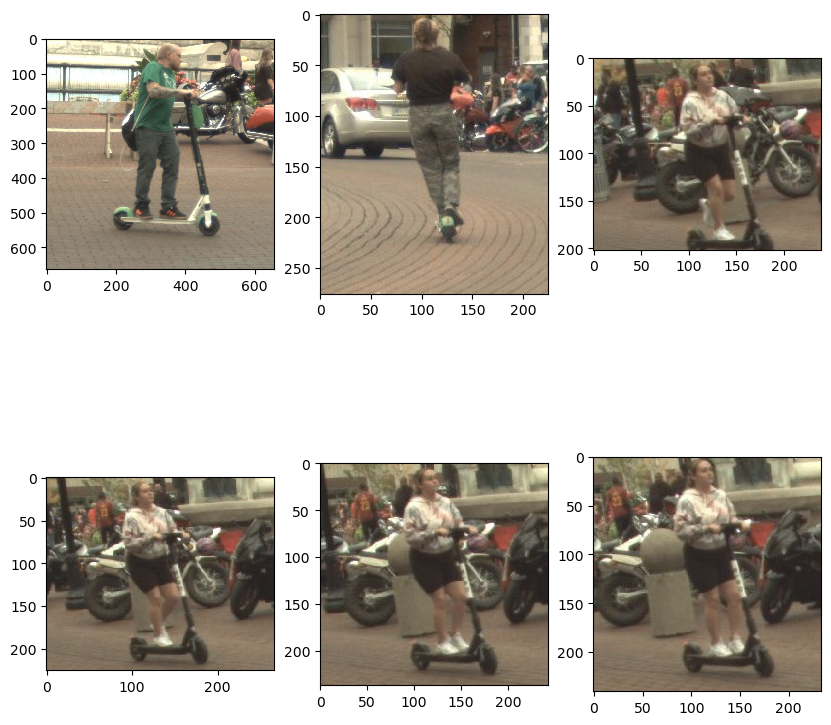

In [4]:
plt.figure(figsize = (10,10))
for i in range(1,7) :
    plt.subplot(2,3,i)
    plt.imshow(images_rgb_train_esc[i])

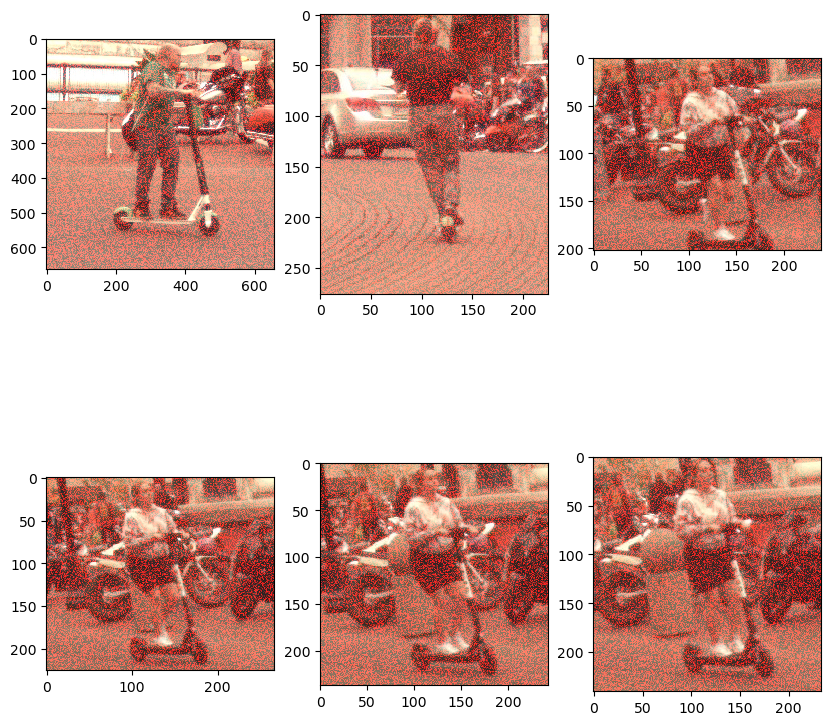

In [5]:
noisy_img = np.empty(len(onlyfiles_train_esc), dtype=object)
for j in range(0,len(onlyfiles_train_esc)) :
    noise = np.zeros(images_rgb_train_esc[j].shape, np.uint8)
    mean = 60
    stddev = 120
    cv.randn(noise, mean, stddev)
    noisy_img[j] = cv.add(images_rgb_train_esc[j], noise)

plt.figure(figsize = (10,10))
for k in range(1,7) :
    plt.subplot(2,3,k)
    plt.imshow(noisy_img[k])

In [6]:
for a in range(0,len(onlyfiles_train_esc)) :
    cv.imwrite(f"C:/Users/krmtt/Desktop/e-scooterDetectionDataset/train/esc/esc_noisy ({a}).jpg" , cv.cvtColor(noisy_img[a] , cv.COLOR_BGR2RGB))

In [7]:
for i in range(1,len(onlyfiles_train_esc)) :
    os.remove(f"C:/Users/krmtt/Desktop/e-scooterDetectionDataset/train/esc/esc ({i}).jpg")

In [8]:
mypath_train_no_esc = "C:/Users/krmtt/Desktop/e-scooterDetectionDataset/train/no_esc"
onlyfiles_train_no_esc = [ f for f in listdir(mypath_train_no_esc) if isfile(join(mypath_train_no_esc,f)) ]
images_train_no_esc = np.empty(len(onlyfiles_train_no_esc), dtype=object)
images_rgb_train_no_esc = np.empty(len(onlyfiles_train_no_esc), dtype=object)

for n in range(0, len(onlyfiles_train_no_esc)):
    images_train_no_esc[n] = cv.imread( join(mypath_train_no_esc,onlyfiles_train_no_esc[n]) )
    images_rgb_train_no_esc[n] = cv.cvtColor(images_train_no_esc[n] , cv.COLOR_BGR2RGB)

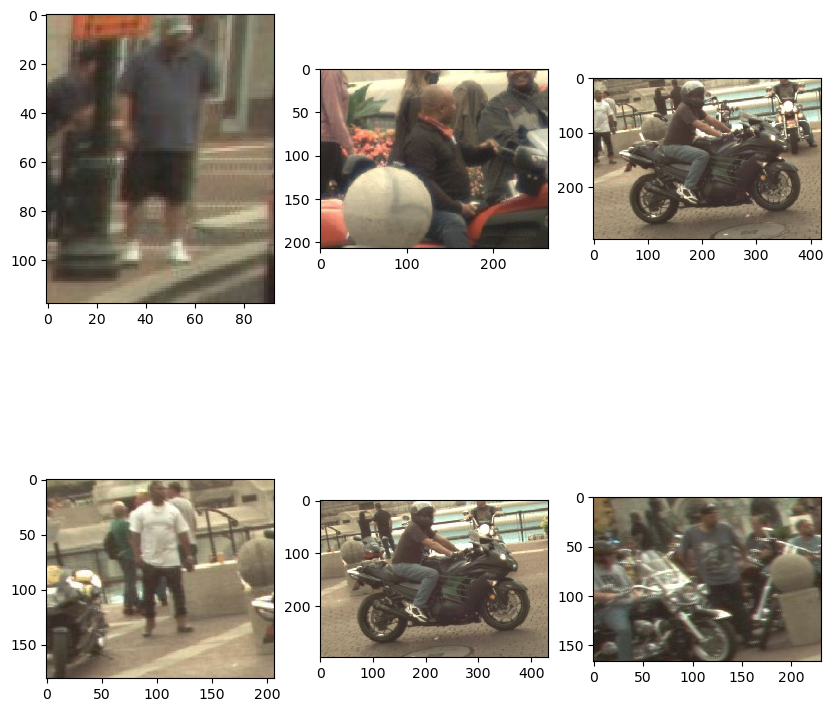

In [9]:
plt.figure(figsize = (10,10))
for i in range(1,7) :
    plt.subplot(2,3,i)
    plt.imshow(images_rgb_train_no_esc[i])

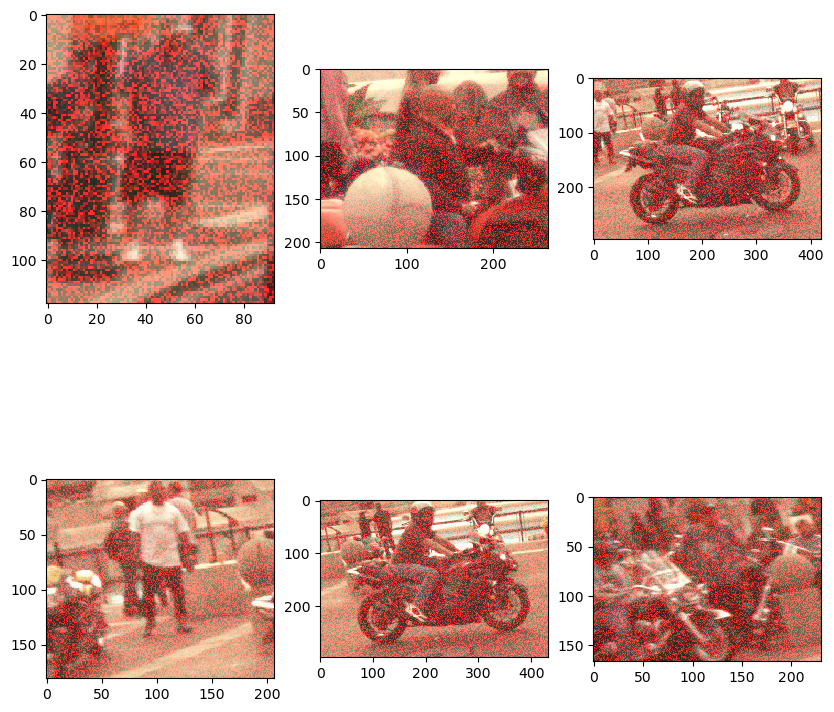

In [10]:
noisy_img = np.empty(len(onlyfiles_train_no_esc), dtype=object)
for j in range(0,len(onlyfiles_train_no_esc)) :
    noise = np.zeros(images_rgb_train_no_esc[j].shape, np.uint8)
    mean = 60
    stddev = 120
    cv.randn(noise, mean, stddev)
    noisy_img[j] = cv.add(images_rgb_train_no_esc[j], noise)

plt.figure(figsize = (10,10))
for k in range(1,7) :
    plt.subplot(2,3,k)
    plt.imshow(noisy_img[k])

In [11]:
for a in range(0,len(onlyfiles_train_no_esc)) :
    cv.imwrite(f"C:/Users/krmtt/Desktop/e-scooterDetectionDataset/train/no_esc/no_esc_noisy ({a}).jpg" , cv.cvtColor(noisy_img[a] , cv.COLOR_BGR2RGB))

In [12]:
for i in range(1,len(onlyfiles_train_no_esc)) :
    os.remove(f"C:/Users/krmtt/Desktop/e-scooterDetectionDataset/train/no_esc/no_esc ({i}).jpg")

In [13]:
print('total training e scooter rider images:', len(os.listdir(train_esc_dir)))
print('total training non e scooter rider images:', len(os.listdir(train_no_esc_dir)))
print('total validation e scooter rider images:', len(os.listdir(validation_esc_dir)))
print('total validation non e scooter rider images:', len(os.listdir(validation_no_esc_dir)))
print('total test e scooter rider images:', len(os.listdir(test_esc_dir)))
print('total test non e scooter rider images:', len(os.listdir(test_no_esc_dir)))

total training e scooter rider images: 9000
total training non e scooter rider images: 9000
total validation e scooter rider images: 1000
total validation non e scooter rider images: 1000
total test e scooter rider images: 744
total test non e scooter rider images: 699


In [14]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(160, 160), batch_size=32, class_mode='binary')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1443 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:',labels_batch.shape)
    break

data batch shape: (32, 160, 160, 3)
label batch shape: (32,)


In [17]:
from keras.applications import VGG16


from keras.applications import VGG16
conv_base = VGG16(input_shape=(160,160,3),
                        include_top=False,
                        weights='imagenet')

In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False

In [19]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [20]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest')

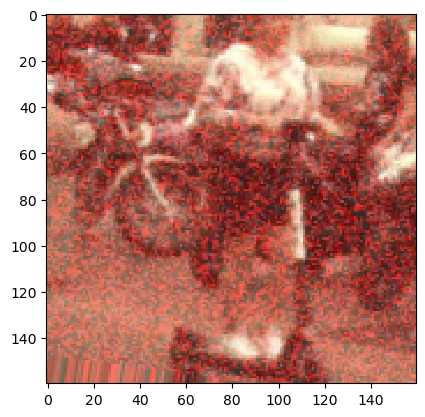

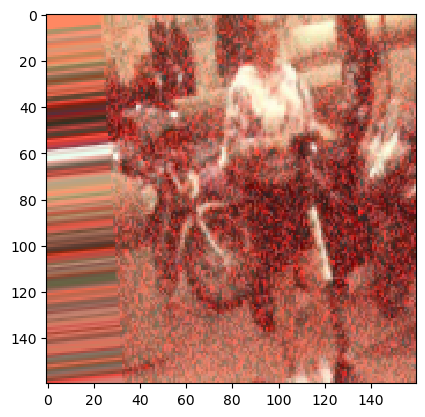

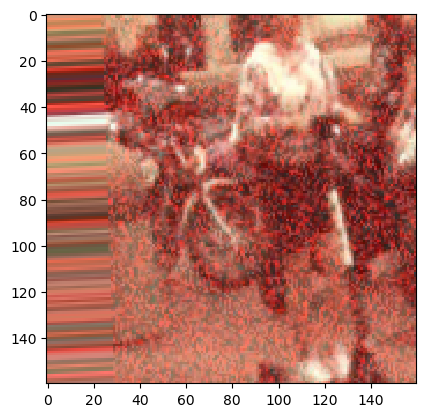

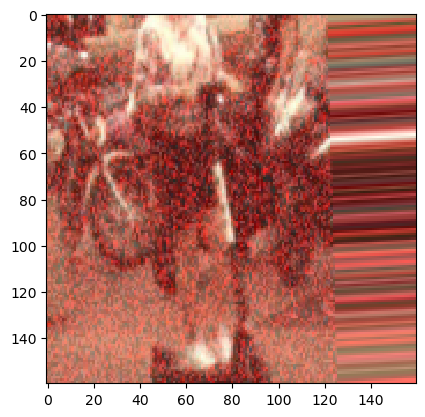

In [22]:
from keras_preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_esc_dir, fname) for fname in os.listdir(train_esc_dir) ]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(160, 160))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=128,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=128)

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
128/128 [==============================] - 74s 579ms/step - loss: 0.5743 - acc: 0.7019 - val_loss: 0.3525 - val_acc: 0.8784
Epoch 2/30
128/128 [==============================] - 56s 434ms/step - loss: 0.4278 - acc: 0.8035 - val_loss: 0.2836 - val_acc: 0.8920
Epoch 3/30
128/128 [==============================] - 52s 408ms/step - loss: 0.3716 - acc: 0.8394 - val_loss: 0.3027 - val_acc: 0.8821
Epoch 4/30
128/128 [==============================] - 50s 392ms/step - loss: 0.3494 - acc: 0.8501 - val_loss: 0.2475 - val_acc: 0.9181
Epoch 5/30
128/128 [==============================] - 40s 310ms/step - loss: 0.2951 - acc: 0.8779 - val_loss: 0.4772 - val_acc: 0.8334
Epoch 6/30
128/128 [==============================] - 35s 275ms/step - loss: 0.2888 - acc: 0.8799 - val_loss: 0.2656 - val_acc: 0.9154
Epoch 7/30
128/128 [==============================] - 39s

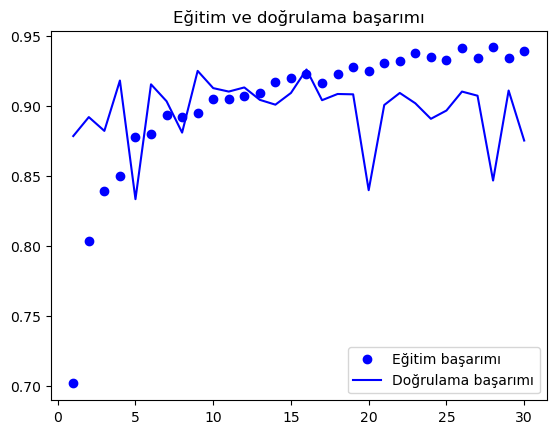

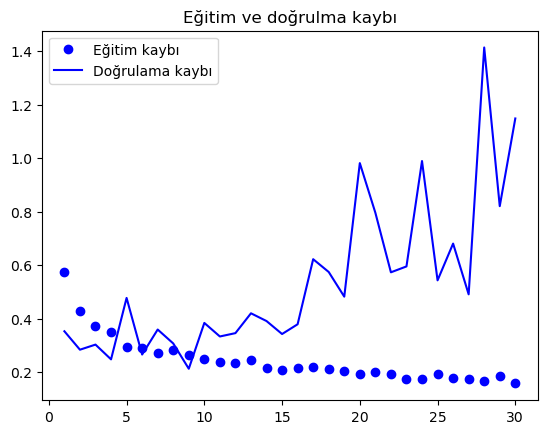

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama başarımı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulma kaybı')
plt.legend()

plt.show()

In [25]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.8733290897707208
